<a href="https://colab.research.google.com/github/cweida/DS301-f19-Weida/blob/master/Song_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
drive.mount('/content/gdrive')
import pickle

  Created wheel for spotipy: filename=spotipy-2.4.4-cp36-none-any.whl size=12336 sha256=87f0d905585d004264dbf36f79a6d2b17ebafdee6f05e252f4e755981faba810
  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
Successfully built spotipy
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Set spotipy/spotify credentials (Allows access to spotify api)

client_credentials_manager = SpotifyClientCredentials(client_id='e636a63ff6474297ae1e3c8c0c712102',
                                                     client_secret='ad58496544b540a9832c52175948c66e')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [0]:
#Import DataFrame. Skip bad lines (Songs with extra fields beyond title)
df = pd.read_csv('/content/gdrive/My Drive/spotify_dataset.csv',index_col = False, error_bad_lines = False)

b'Skipping line 14735: expected 4 fields, saw 5\nSkipping line 15931: expected 4 fields, saw 6\nSkipping line 18825: expected 4 fields, saw 5\nSkipping line 22437: expected 4 fields, saw 6\nSkipping line 23009: expected 4 fields, saw 7\nSkipping line 24244: expected 4 fields, saw 6\nSkipping line 24245: expected 4 fields, saw 6\nSkipping line 24247: expected 4 fields, saw 6\nSkipping line 24248: expected 4 fields, saw 6\nSkipping line 24250: expected 4 fields, saw 6\nSkipping line 24253: expected 4 fields, saw 6\nSkipping line 24254: expected 4 fields, saw 5\nSkipping line 24467: expected 4 fields, saw 5\nSkipping line 25091: expected 4 fields, saw 5\nSkipping line 28223: expected 4 fields, saw 5\nSkipping line 28506: expected 4 fields, saw 5\nSkipping line 28512: expected 4 fields, saw 5\nSkipping line 28513: expected 4 fields, saw 5\nSkipping line 28520: expected 4 fields, saw 5\nSkipping line 32192: expected 4 fields, saw 5\nSkipping line 35773: expected 4 fields, saw 5\nSkipping li

In [0]:
#Creating dictionary. {Playlistname: [tracknames]}

playlistkey = df.iloc[0, 3]
num_rows = len(df.index)
currentplaylistsongs = []
playlistdict = {}


for i in range(num_rows):
  if df.iloc[i,3] ==  playlistkey:
    currentplaylistsongs.append(df.iloc[i,2])
  else:
    playlistdict[playlistkey] = currentplaylistsongs
    
    
    currentplaylistsongs = []
    playlistkey = df.iloc[i,3]
    currentplaylistsongs.append(df.iloc[i,2])

In [0]:
#Acquire only playlists with len == 10
tenSongPlaylists = {}

for i in playlistdict:
  if len(playlistdict[i]) == 10:
    tenSongPlaylists[i] = playlistdict[i]

#Checking number of 10 song playlists
#81,450 total songs in ten song playlists

print(len(tenSongPlaylists.keys()))

8145


In [0]:
#Convert dictionary into a list. Makes easier to search spotipy api
song_ids_list = []
for i in tenSongPlaylists:
  for j in tenSongPlaylists[i]:
    song_ids_list.append(j)

song_ids_list[:100]

['1 Up',
 'Extra Life',
 'Heart Shaped Pixel',
 'Live Die 5 Continues',
 'Maximized',
 'My Megadrive',
 'Player One - Feat. Ddash Of Ddamage',
 'Super Easy',
 'The Backup',
 'The Master Key',
 'About Today',
 'Casimir Pulaski Day',
 'Cast No Shadow',
 'For the love of',
 'Fria vägar ut',
 "I'll Be Missing You (feat. 112)",
 'Night Comes On',
 'Shortline',
 'Show Me the Place',
 'The Sound of Silence',
 'Given To Fly',
 'Got To Give It Up',
 'Heart Is Hard To Find',
 'History Chimes',
 'Interlude II',
 'No Talk',
 'Normal People',
 'There, There',
 'You Can Make Me Feel Bad',
 'push pull',
 'Con una Estrella en Cada Mano',
 'La Canción Que No Termina',
 'Lo Que Tu Prefieres',
 'Me Contó (La Canción de los Equivocados)',
 'Mi Única Verdad',
 'Mira Dentro',
 'No Pide Tanto, Idiota',
 'Nunca Estarás Sola',
 'Perdona Si Te Llamo Amor',
 'Te Merece la Pena',
 'Cry Me a River',
 'Mirrors',
 'Mirrors - Radio Edit',
 'Rock Your Body',
 'SexyBack',
 'Señorita',
 'Suit & Tie featuring JAY Z',
 'T

In [0]:
#Search spotify for the song name to acquire the song ID. Easier to obtain info about song from Spotify
for i in range(int(len(song_ids_list)/3)):
  if type(song_ids_list[i]) != str:
    continue
  
  results = sp.search(q = 'track:' + song_ids_list[i], type = 'track')
  items = results['tracks']['items']

  if len(items) > 0:
      song_ids_list[i] = items[0]['id']
  else:
      song_ids_list[i] = '0'

In [0]:
song_name_list = song_ids_list
song_ids_list = song_ids_list[:int(len(song_ids_list)/3)]

In [0]:
song_ids_list[:10]

['5G2c6FsfTzgYUzageCmfXY',
 '0AzwzBnprLl9SAv26Up4TY',
 '3ZXmrZoffcd93jYwUOnd6r',
 '4UbBvp2Qh4lMrpNtgfDp7o',
 '2heh7QRkaw3wwVmcb3j95G',
 '3TI8YR2t52TF9zZ1Y2aozS',
 '0',
 '4xKw2Z1tFBTeBl12EKhH8U',
 '3a7nY1Nx3kgXspepGKXGnh',
 '4N4aCUVDQr0nGY4CjjomUP']

In [0]:
#Create list of column headers for dataframe. Using the audiofeatures keys from spotify for easy transfer into dataframe
columns = list(sp.audio_features(song_ids_list[0])[0].keys())
header = ['songId']
for i in columns:
  header.append(i)
header

['songId',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [0]:
#create dataframe
df = pd.DataFrame(index = range(len(song_ids_list)), columns = header)
df.iloc[:,0] = song_ids_list
df.head(10)

,songId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,5G2c6FsfTzgYUzageCmfXY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0AzwzBnprLl9SAv26Up4TY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3ZXmrZoffcd93jYwUOnd6r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4UbBvp2Qh4lMrpNtgfDp7o,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2heh7QRkaw3wwVmcb3j95G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3TI8YR2t52TF9zZ1Y2aozS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4xKw2Z1tFBTeBl12EKhH8U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3a7nY1Nx3kgXspepGKXGnh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4N4aCUVDQr0nGY4CjjomUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Drop any row which had unfindeable song ID
df = df[df.iloc[:,0] != '0']
df.reset_index(inplace = True, drop = True)
df.head(10)

,songId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,5G2c6FsfTzgYUzageCmfXY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0AzwzBnprLl9SAv26Up4TY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3ZXmrZoffcd93jYwUOnd6r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4UbBvp2Qh4lMrpNtgfDp7o,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2heh7QRkaw3wwVmcb3j95G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3TI8YR2t52TF9zZ1Y2aozS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4xKw2Z1tFBTeBl12EKhH8U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3a7nY1Nx3kgXspepGKXGnh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4N4aCUVDQr0nGY4CjjomUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,33xh6sgYhga7iQ7HARN7V6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
len(sp.audio_features(df.iloc[:100,0]))

100

In [0]:
#searching spotify in batches of 100 to cut down on total searches (the limiting speed factor)



for i in range(0,len(df.iloc[:,0]), 100):      #iterate over ids in increments of 100
  results = sp.audio_features(df.iloc[i:i+100,0]) #Search for each 100 songID batch
  for column in df: #Iterate over each column
    for j in range(100):  #Iterate over each song in the batch
      if column == 'songId': #SongID is an invalid song feature so skip it
        continue
      
      try:   #Try to pull audiofeatures.
        df.loc[[i+j],[column]] = results[j][column]  
      except:
        print("Failed to fill space at: df.loc[[", i+j,"]],[", column,"]]") #Tell me where it failed
        pass





# for i in df.index:
#   results = sp.audio_features(df.iloc[i,0])[0]
#   for column in df:
#     if column == 'songId':
#       continue
    
#     try:
#       print('Trying')
#       df.loc[[i],[column]] = results[column]
#     except:
#       pass


Failed to fill space at: df.loc[[ 5922 ]],[ danceability ]]
Failed to fill space at: df.loc[[ 5922 ]],[ energy ]]
Failed to fill space at: df.loc[[ 5922 ]],[ key ]]
Failed to fill space at: df.loc[[ 5922 ]],[ loudness ]]
Failed to fill space at: df.loc[[ 5922 ]],[ mode ]]
Failed to fill space at: df.loc[[ 5922 ]],[ speechiness ]]
Failed to fill space at: df.loc[[ 5922 ]],[ acousticness ]]
Failed to fill space at: df.loc[[ 5922 ]],[ instrumentalness ]]
Failed to fill space at: df.loc[[ 5922 ]],[ liveness ]]
Failed to fill space at: df.loc[[ 5922 ]],[ valence ]]
Failed to fill space at: df.loc[[ 5922 ]],[ tempo ]]
Failed to fill space at: df.loc[[ 5922 ]],[ type ]]
Failed to fill space at: df.loc[[ 5922 ]],[ id ]]
Failed to fill space at: df.loc[[ 5922 ]],[ uri ]]
Failed to fill space at: df.loc[[ 5922 ]],[ track_href ]]
Failed to fill space at: df.loc[[ 5922 ]],[ analysis_url ]]
Failed to fill space at: df.loc[[ 5922 ]],[ duration_ms ]]
Failed to fill space at: df.loc[[ 5922 ]],[ time_s

In [0]:
df.head()

,songId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,5G2c6FsfTzgYUzageCmfXY,0.713,0.718,2,-3.806,1,0.0278,0.00233,0,0.0838,0.656,126.999,audio_features,5G2c6FsfTzgYUzageCmfXY,spotify:track:5G2c6FsfTzgYUzageCmfXY,https://api.spotify.com/v1/tracks/5G2c6FsfTzgY...,https://api.spotify.com/v1/audio-analysis/5G2c...,197600,4
1,0AzwzBnprLl9SAv26Up4TY,0.854,0.991,10,-5.593,0,0.0497,0.167,0.881,0.118,0.512,128.032,audio_features,0AzwzBnprLl9SAv26Up4TY,spotify:track:0AzwzBnprLl9SAv26Up4TY,https://api.spotify.com/v1/tracks/0AzwzBnprLl9...,https://api.spotify.com/v1/audio-analysis/0Azw...,77200,4
2,3ZXmrZoffcd93jYwUOnd6r,0.61,0.608,9,-5.92,0,0.0282,0.00125,0.712,0.101,0.533,110.019,audio_features,3ZXmrZoffcd93jYwUOnd6r,spotify:track:3ZXmrZoffcd93jYwUOnd6r,https://api.spotify.com/v1/tracks/3ZXmrZoffcd9...,https://api.spotify.com/v1/audio-analysis/3ZXm...,275813,4
3,4UbBvp2Qh4lMrpNtgfDp7o,0.616,0.732,1,-7.168,1,0.0601,1.33e-05,0.805,0.137,0.859,137.959,audio_features,4UbBvp2Qh4lMrpNtgfDp7o,spotify:track:4UbBvp2Qh4lMrpNtgfDp7o,https://api.spotify.com/v1/tracks/4UbBvp2Qh4lM...,https://api.spotify.com/v1/audio-analysis/4UbB...,200640,4
4,2heh7QRkaw3wwVmcb3j95G,0.565,0.68,2,-10.013,1,0.0411,0.0917,0.705,0.0844,0.38,126.77,audio_features,2heh7QRkaw3wwVmcb3j95G,spotify:track:2heh7QRkaw3wwVmcb3j95G,https://api.spotify.com/v1/tracks/2heh7QRkaw3w...,https://api.spotify.com/v1/audio-analysis/2heh...,349867,4


In [0]:
dfgenre = pd.DataFrame(index = range(len(df.index)), columns = ['Genre'])
dfgenre.head()

,Genre
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [0]:
for i in range(0,len(df.index),50):
  results = sp.tracks(df.iloc[i:i+50,0])['tracks']
  if len(results) == 0:
    continue
  for j in range(50):
    try:
      dfgenre.iloc[i+j,0] = results[j]['artists'][0]['id']
    except:
      pass

retrying ...1secs


In [0]:
for i in range(0,len(df.index),50):
  results = sp.artists(dfgenre.iloc[i:i+50,0])['artists']
  if len(results) == 0:
    continue
  for j in range(50):
    try:
      dfgenre.iloc[i+j,0] = results[j]['genres']
    except:
      pass

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [0]:
df = pd.concat([df, dfgenre], axis = 1)
df.head()

,songId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Genre
0,5G2c6FsfTzgYUzageCmfXY,0.713,0.718,2,-3.806,1,0.0278,0.00233,0,0.0838,0.656,126.999,audio_features,5G2c6FsfTzgYUzageCmfXY,spotify:track:5G2c6FsfTzgYUzageCmfXY,https://api.spotify.com/v1/tracks/5G2c6FsfTzgY...,https://api.spotify.com/v1/audio-analysis/5G2c...,197600,4,"[boy band, dance pop, pop, post-teen pop, tale..."
1,0AzwzBnprLl9SAv26Up4TY,0.854,0.991,10,-5.593,0,0.0497,0.167,0.881,0.118,0.512,128.032,audio_features,0AzwzBnprLl9SAv26Up4TY,spotify:track:0AzwzBnprLl9SAv26Up4TY,https://api.spotify.com/v1/tracks/0AzwzBnprLl9...,https://api.spotify.com/v1/audio-analysis/0Azw...,77200,4,[bmore]
2,3ZXmrZoffcd93jYwUOnd6r,0.61,0.608,9,-5.92,0,0.0282,0.00125,0.712,0.101,0.533,110.019,audio_features,3ZXmrZoffcd93jYwUOnd6r,spotify:track:3ZXmrZoffcd93jYwUOnd6r,https://api.spotify.com/v1/tracks/3ZXmrZoffcd9...,https://api.spotify.com/v1/audio-analysis/3ZXm...,275813,4,[]
3,4UbBvp2Qh4lMrpNtgfDp7o,0.616,0.732,1,-7.168,1,0.0601,1.33e-05,0.805,0.137,0.859,137.959,audio_features,4UbBvp2Qh4lMrpNtgfDp7o,spotify:track:4UbBvp2Qh4lMrpNtgfDp7o,https://api.spotify.com/v1/tracks/4UbBvp2Qh4lM...,https://api.spotify.com/v1/audio-analysis/4UbB...,200640,4,[]
4,2heh7QRkaw3wwVmcb3j95G,0.565,0.68,2,-10.013,1,0.0411,0.0917,0.705,0.0844,0.38,126.77,audio_features,2heh7QRkaw3wwVmcb3j95G,spotify:track:2heh7QRkaw3wwVmcb3j95G,https://api.spotify.com/v1/tracks/2heh7QRkaw3w...,https://api.spotify.com/v1/audio-analysis/2heh...,349867,4,"[bass trap, brostep, edm, electronic trap, liv..."


In [0]:
for i in range(len(df.index)):
   if len(df.iloc[i,-1]) == 0:
     continue
   for j in range(len(df.iloc[i,-1])):
    if 'pop' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'pop'
      break
    elif 'rock' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'rock'
      break
    
    elif 'metal' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'metal'
      break
    
    elif 'reggae' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'reggae'
      break
    
    elif 'jazz' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'jazz'
      break
    
    elif 'hip hop' in df.iloc[i,-1][j] or 'rap' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'hip hop'
      break
      
    elif 'indie' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'indie'
      break
      
    elif 'disco' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'disco'
      break
    
    elif 'country' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'country'
      break
      
    elif 'edm' in df.iloc[i,-1][j] or 'elec' in df.iloc[i,-1][j] or 'step' in df.iloc[i,-1][j] or 'dub' in df.iloc[i,-1][j]:
      df.iloc[i,-1] = 'edm'
      break
    

In [0]:
for i in range(len(df.index)):
  if type(df.iloc[i,-1]) != str:
    df.iloc[i,-1] = 'none'

df = df.query('Genre != "none"')
df = df.reset_index(drop = True)
df.head()

,songId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Genre
0,5G2c6FsfTzgYUzageCmfXY,0.713,0.718,2,-3.806,1,0.0278,0.00233,0,0.0838,0.656,126.999,audio_features,5G2c6FsfTzgYUzageCmfXY,spotify:track:5G2c6FsfTzgYUzageCmfXY,https://api.spotify.com/v1/tracks/5G2c6FsfTzgY...,https://api.spotify.com/v1/audio-analysis/5G2c...,197600,4,pop
1,2heh7QRkaw3wwVmcb3j95G,0.565,0.68,2,-10.013,1,0.0411,0.0917,0.705,0.0844,0.38,126.77,audio_features,2heh7QRkaw3wwVmcb3j95G,spotify:track:2heh7QRkaw3wwVmcb3j95G,https://api.spotify.com/v1/tracks/2heh7QRkaw3w...,https://api.spotify.com/v1/audio-analysis/2heh...,349867,4,hip hop
2,4N4aCUVDQr0nGY4CjjomUP,0.337,0.415,5,-10.336,0,0.0355,0.46,0.0601,0.105,0.291,124.943,audio_features,4N4aCUVDQr0nGY4CjjomUP,spotify:track:4N4aCUVDQr0nGY4CjjomUP,https://api.spotify.com/v1/tracks/4N4aCUVDQr0n...,https://api.spotify.com/v1/audio-analysis/4N4a...,660136,4,jazz
3,33xh6sgYhga7iQ7HARN7V6,0.556,0.618,0,-13.482,1,0.043,0.326,0.694,0.124,0.464,104.983,audio_features,33xh6sgYhga7iQ7HARN7V6,spotify:track:33xh6sgYhga7iQ7HARN7V6,https://api.spotify.com/v1/tracks/33xh6sgYhga7...,https://api.spotify.com/v1/audio-analysis/33xh...,250760,4,pop
4,1u1YU1LE0FWHFOHpR2iXua,0.686,0.172,8,-14.979,1,0.0409,0.909,0.00154,0.286,0.563,133.899,audio_features,1u1YU1LE0FWHFOHpR2iXua,spotify:track:1u1YU1LE0FWHFOHpR2iXua,https://api.spotify.com/v1/tracks/1u1YU1LE0FWH...,https://api.spotify.com/v1/audio-analysis/1u1Y...,353947,4,pop


In [0]:
pickle.dump(df, open('FinalFinalFinal.pickle', 'wb'))

In [0]:
df = pickle.load(open('/content/gdrive/My Drive/Colab Notebooks/PlaylistDictionaries/FinalFinalFinal.pickle', 'rb'))

In [0]:
df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis = 1, inplace = True)


In [16]:
df.head()

,songId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Genre
0,5G2c6FsfTzgYUzageCmfXY,0.713,0.718,2,-3.806,1,0.0278,0.00233,0,0.0838,0.656,126.999,197600,4,pop
1,2heh7QRkaw3wwVmcb3j95G,0.565,0.68,2,-10.013,1,0.0411,0.0917,0.705,0.0844,0.38,126.77,349867,4,hip hop
2,4N4aCUVDQr0nGY4CjjomUP,0.337,0.415,5,-10.336,0,0.0355,0.46,0.0601,0.105,0.291,124.943,660136,4,jazz
3,33xh6sgYhga7iQ7HARN7V6,0.556,0.618,0,-13.482,1,0.043,0.326,0.694,0.124,0.464,104.983,250760,4,pop
4,1u1YU1LE0FWHFOHpR2iXua,0.686,0.172,8,-14.979,1,0.0409,0.909,0.00154,0.286,0.563,133.899,353947,4,pop


In [0]:
df.head()

,songId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Genre
0,5G2c6FsfTzgYUzageCmfXY,0.713,0.718,2,-3.806,1,0.0278,0.00233,0,0.0838,0.656,126.999,197600,4,pop
1,2heh7QRkaw3wwVmcb3j95G,0.565,0.68,2,-10.013,1,0.0411,0.0917,0.705,0.0844,0.38,126.77,349867,4,not pop
2,4N4aCUVDQr0nGY4CjjomUP,0.337,0.415,5,-10.336,0,0.0355,0.46,0.0601,0.105,0.291,124.943,660136,4,not pop
3,33xh6sgYhga7iQ7HARN7V6,0.556,0.618,0,-13.482,1,0.043,0.326,0.694,0.124,0.464,104.983,250760,4,pop
4,1u1YU1LE0FWHFOHpR2iXua,0.686,0.172,8,-14.979,1,0.0409,0.909,0.00154,0.286,0.563,133.899,353947,4,pop


In [0]:
#Visualization Section
import matplotlib.pyplot as plt

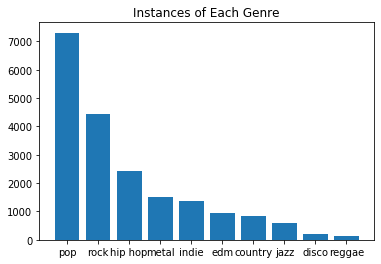

In [0]:
#Plotting distribution of our targets.
#This uneven distribution means we need confusion matrix as a metric in order to determine accuracy


labels = ['pop', 'rock', 'hip hop', 'metal', 'indie', 'edm', 'country', 'jazz', 'disco', 'reggae']

plt.bar(range(10), list(df.iloc[:,-1].value_counts()), tick_label = labels)
plt.title("Instances of Each Genre")
plt.show()

In [0]:
genres = list(df.iloc[:,-1].unique())

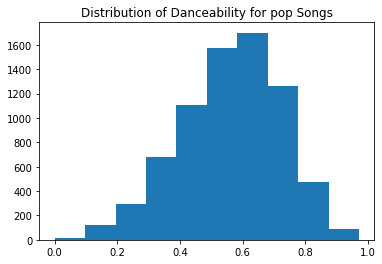

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


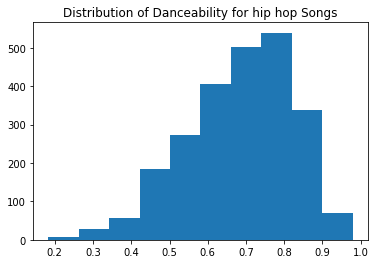

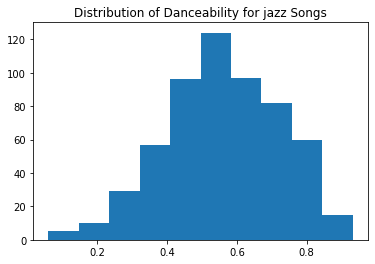

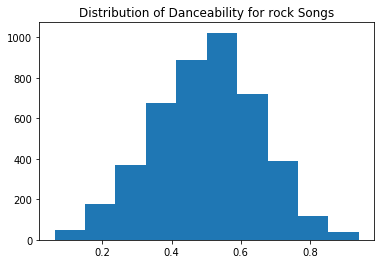

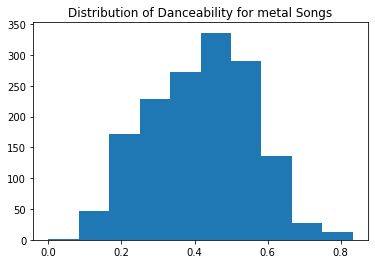

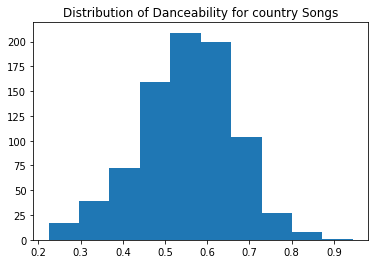

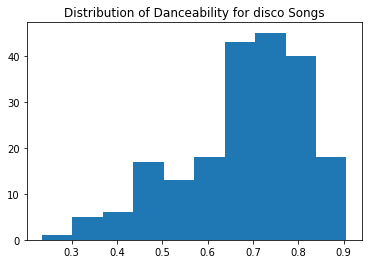

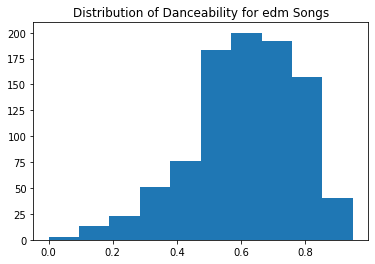

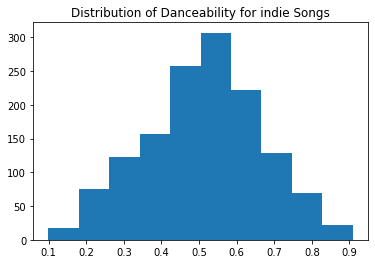

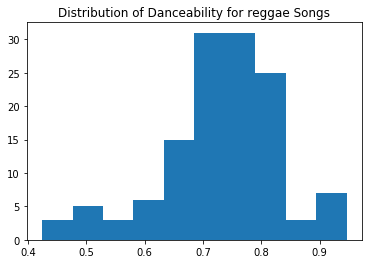

In [0]:
for i in genres:
  df_plot = df[df.iloc[:,-1] == i]
  plt.hist(df_plot.iloc[:,1], bins = 10)
  plt.title('Distribution of Danceability for ' + i + ' Songs')
  plt.show()

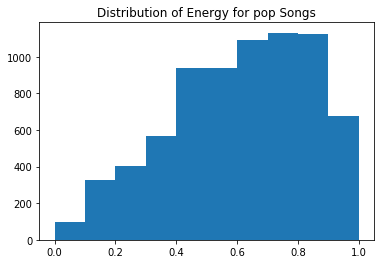

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


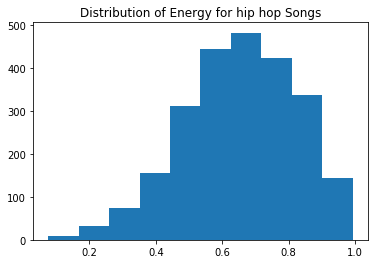

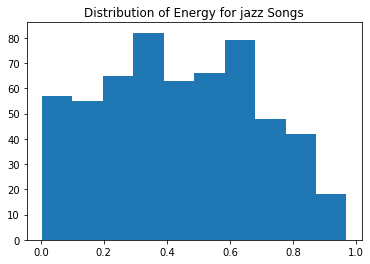

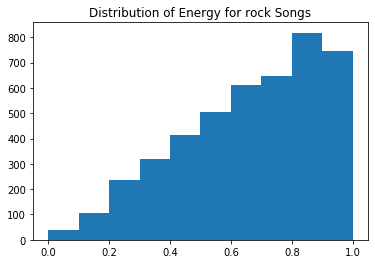

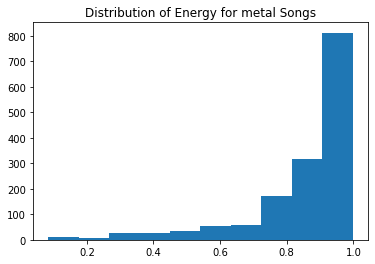

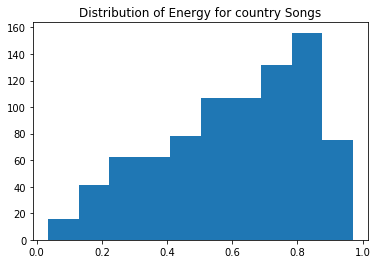

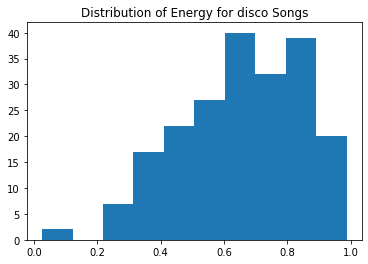

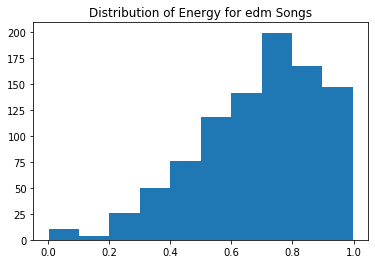

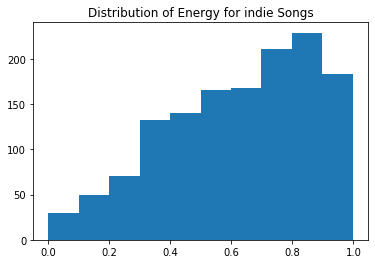

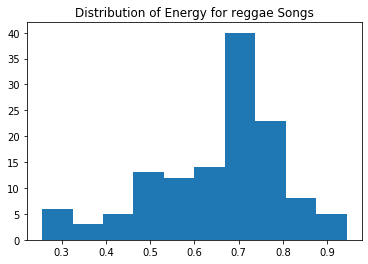

In [0]:
for i in genres:
  df_plot = df[df.iloc[:,-1] == i]
  plt.hist(df_plot.iloc[:,2], bins = 10)
  plt.title('Distribution of Energy for ' + i + ' Songs')
  plt.show()

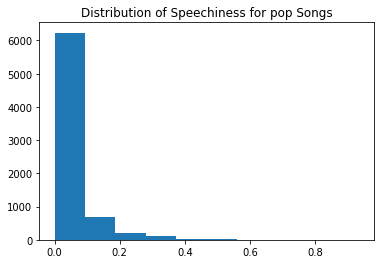

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


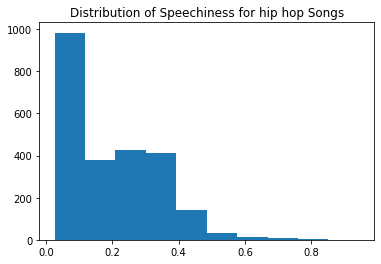

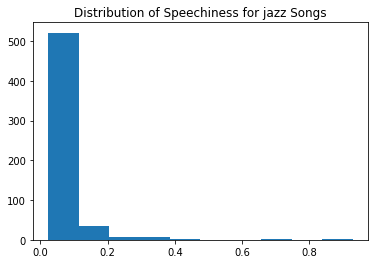

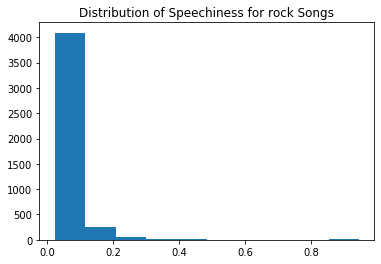

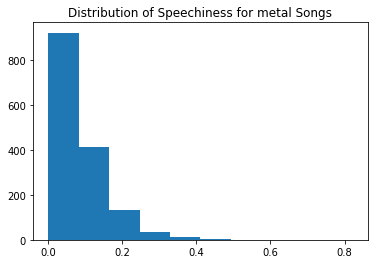

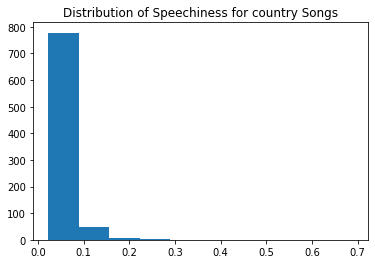

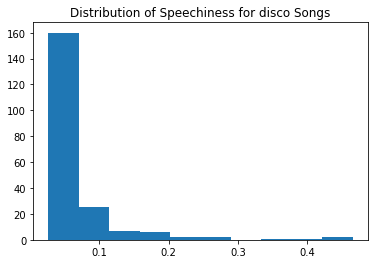

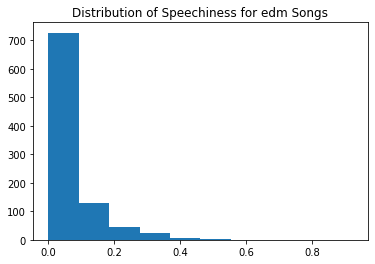

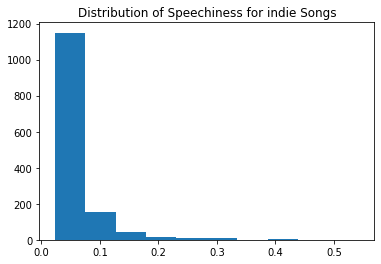

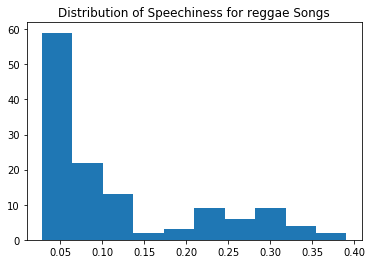

In [0]:
for i in genres:
  df_plot = df[df.iloc[:,-1] == i]
  plt.hist(df_plot.iloc[:,6], bins = 10)
  plt.title('Distribution of Speechiness for ' + i + ' Songs')
  plt.show()

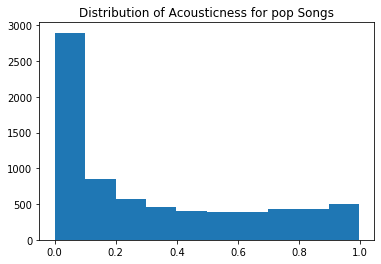

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


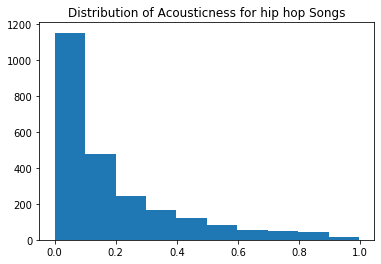

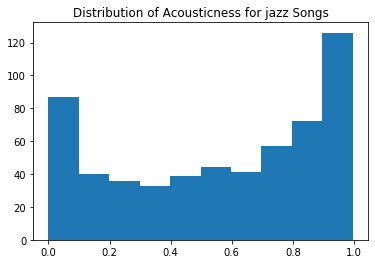

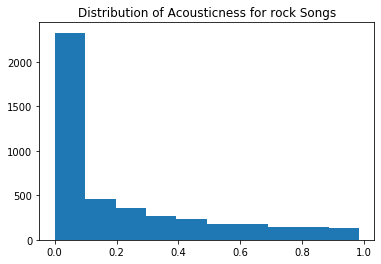

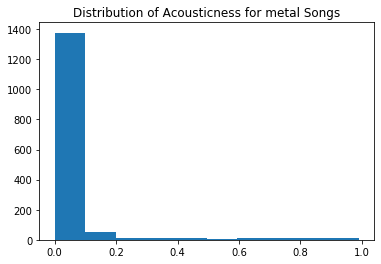

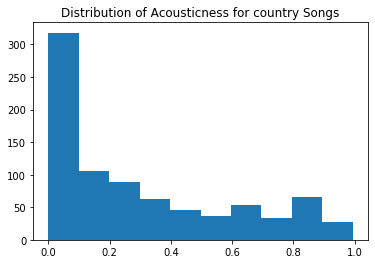

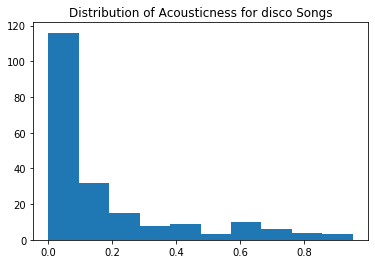

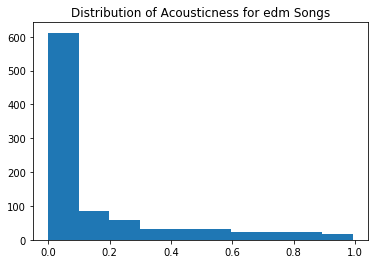

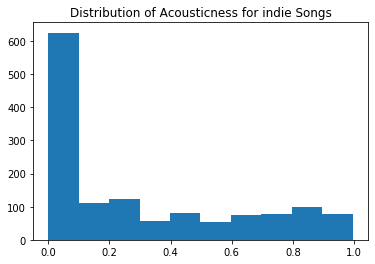

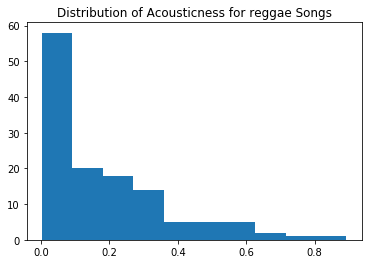

In [0]:
for i in genres:
  df_plot = df[df.iloc[:,-1] == i]
  plt.hist(df_plot.iloc[:,7], bins = 10)
  plt.title('Distribution of Acousticness for ' + i + ' Songs')
  plt.show()

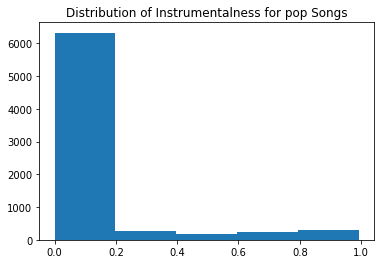

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


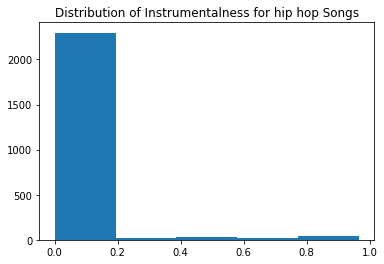

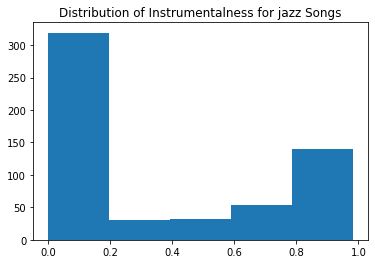

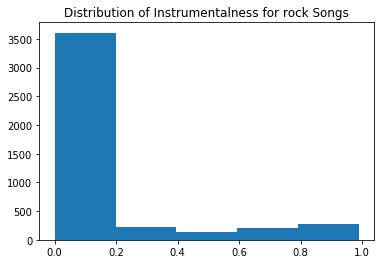

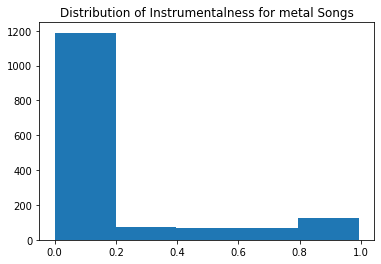

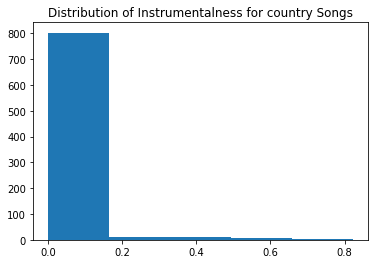

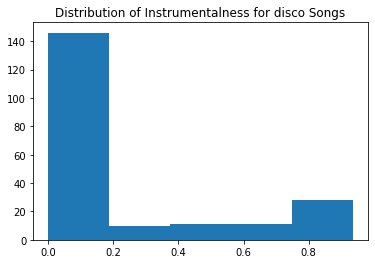

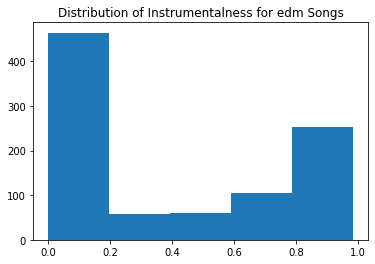

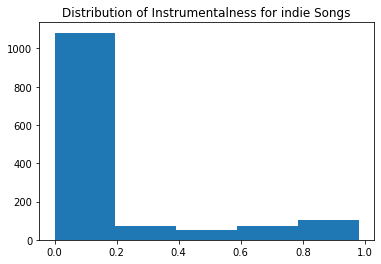

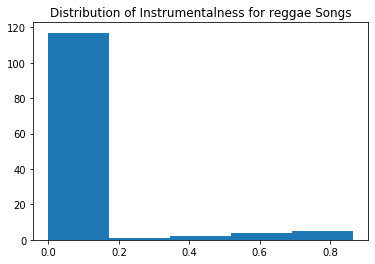

In [0]:
for i in genres:
  df_plot = df[df.iloc[:,-1] == i]
  plt.hist(df_plot.iloc[:,8], bins = 5)
  plt.title('Distribution of Instrumentalness for ' + i + ' Songs')
  plt.show()

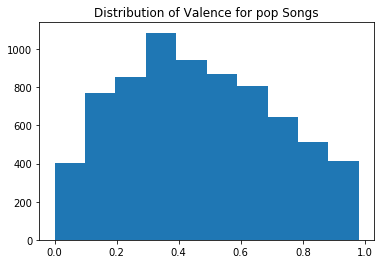

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


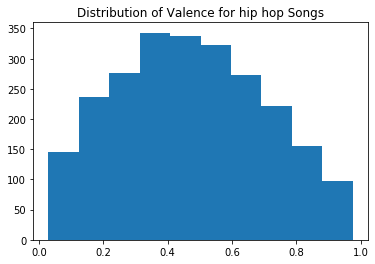

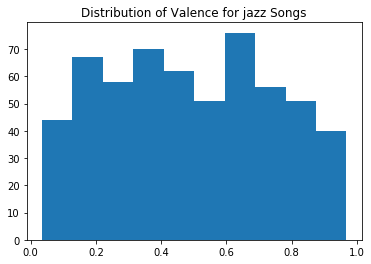

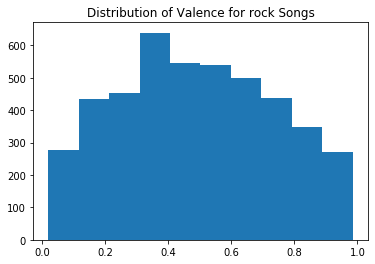

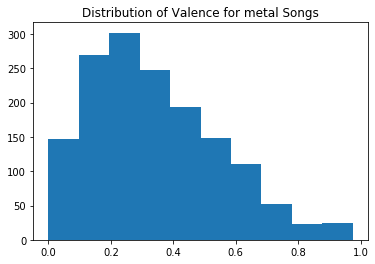

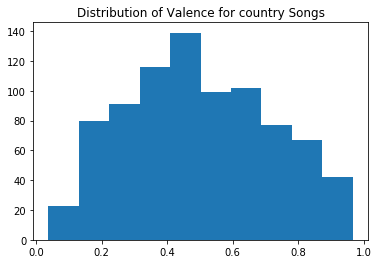

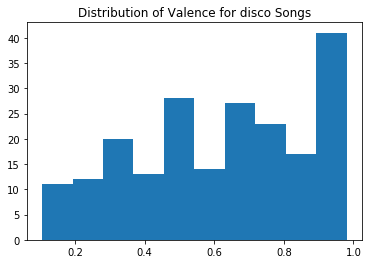

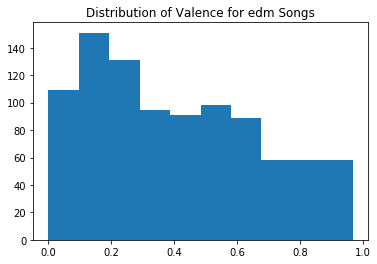

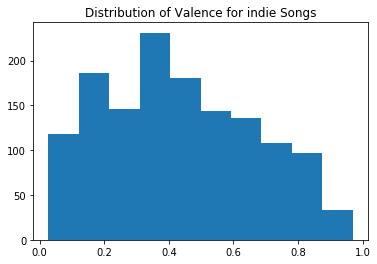

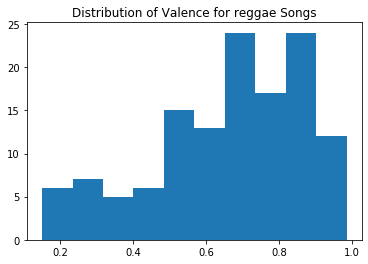

In [0]:
for i in genres:
  df_plot = df[df.iloc[:,-1] == i]
  plt.hist(df_plot.iloc[:,10], bins = 10)
  plt.title('Distribution of Valence for ' + i + ' Songs')
  plt.show()

In [0]:
for i in range(len(df.index)):
  if df.iloc[i,-1] != 'pop':
    df.iloc[i,-1] = 'not pop'



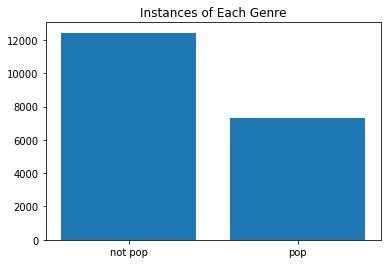

In [18]:
#Trying binary classification of pop vs not pop

labels = ['not pop', 'pop']

plt.bar(range(2), list(df.iloc[:,-1].value_counts()), tick_label = labels)
plt.title("Instances of Each Genre")
plt.show()

In [0]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [20]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])
df.head()

,songId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Genre
0,5G2c6FsfTzgYUzageCmfXY,0.713,0.718,2,-3.806,1,0.0278,0.00233,0,0.0838,0.656,126.999,197600,4,1
1,2heh7QRkaw3wwVmcb3j95G,0.565,0.68,2,-10.013,1,0.0411,0.0917,0.705,0.0844,0.38,126.77,349867,4,0
2,4N4aCUVDQr0nGY4CjjomUP,0.337,0.415,5,-10.336,0,0.0355,0.46,0.0601,0.105,0.291,124.943,660136,4,0
3,33xh6sgYhga7iQ7HARN7V6,0.556,0.618,0,-13.482,1,0.043,0.326,0.694,0.124,0.464,104.983,250760,4,1
4,1u1YU1LE0FWHFOHpR2iXua,0.686,0.172,8,-14.979,1,0.0409,0.909,0.00154,0.286,0.563,133.899,353947,4,1


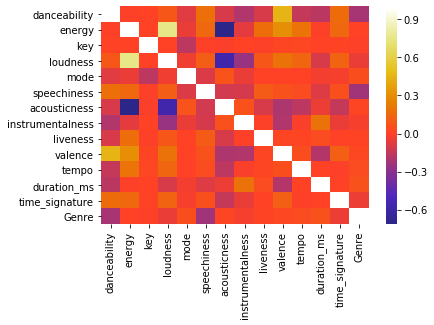

In [0]:
#Overall low correlation between features and target variable.
# Will select danceability, Speechiness, loudness, energy, acousticness, instrumentalness, and valence

sns.heatmap(df.iloc[:,1:].astype(float).corr(), center = 0, cmap = 'CMRmap')

In [0]:
#Model Implementation
#Model Choices: SGD, Random Forest, XGBoost, DNN
#Clustering?
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree #For visualization purposes
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import numpy as np
#df = pickle.load(open('/content/gdrive/My Drive/Colab Notebooks/FINALFINALFINALFINAL.pickle', 'rb'))

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
#TRAIN TEST SPLIT FOR MULTI CLASS
columns = ['danceability',	'energy',	'loudness',	'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo']
#df.dropna(inplace = True)
#X_train, X_test, y_train, y_test = train_test_split(df.loc[:,columns].astype(float),df.iloc[:,-1], test_size = 0.2, random_state = 42)

In [22]:
df.iloc[:,-1].value_counts()

0    12433
1     7303
Name: Genre, dtype: int64

In [0]:
#Binary Classification
df.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,columns].astype(float),df.iloc[:,-1], test_size = 0.2, random_state = 42)

X_test.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [0]:
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [0]:
sgd = SGDClassifier(early_stopping= False, n_jobs = -1, shuffle = True, max_iter= 50000, )
sgd.fit(X_resample, y_resample)
y_pred = sgd.predict(X_test)

In [37]:
print("Confusion_matrix: ", multilabel_confusion_matrix(y_test, y_pred))
print("f1_score(weighted): ", f1_score(y_test, y_pred, average = 'weighted'))
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print("precision_score(weighted): ", precision_score(y_test, y_pred, average = 'weighted'))
print("recall_score(weighted): ", recall_score(y_test, y_pred, average = 'weighted'))

Confusion_matrix:  [[[   4 1432]
  [   4 2507]]

 [[2507    4]
  [1432    4]]]
f1_score(weighted):  0.4965587887346026
accuracy_score:  0.6361793767418292
precision_score(weighted):  0.5868104633152408
recall_score(weighted):  0.6361793767418292


In [0]:
dtc = DecisionTreeClassifier()
dtc.fit(X_resample, y_resample)
y_pred = dtc.predict(X_test)

In [39]:
print("Confusion_matrix: ", multilabel_confusion_matrix(y_test, y_pred))
print("f1_score(micro): ", f1_score(y_test, y_pred, average = 'micro'))
print("f1_score(macro): ", f1_score(y_test, y_pred, average = 'macro'))
print("f1_score(weighted): ", f1_score(y_test, y_pred, average = 'weighted'))
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print("precision_score(micro): ", precision_score(y_test, y_pred, average = 'micro' ))
print("precision_score(macro): ", precision_score(y_test, y_pred, average = 'macro'))
print("precision_score(weighted): ", precision_score(y_test, y_pred, average = 'weighted'))
print("recall_score(weighted): ", recall_score(y_test, y_pred, average = 'weighted'))

Confusion_matrix:  [[[1039  397]
  [ 606 1905]]

 [[1905  606]
  [ 397 1039]]]
f1_score(micro):  0.745882949075247
f1_score(macro):  0.7330312061222807
f1_score(weighted):  0.748984582189762
accuracy_score:  0.745882949075247
precision_score(micro):  0.745882949075247
precision_score(macro):  0.7295761053557235
precision_score(weighted):  0.7562577750642285
recall_score(weighted):  0.745882949075247


In [0]:
#XGBoost Random Forest

boostRF = xgb.XGBRFClassifier(max_depth = 30, n_estimators = 100, verbosity = 1, n_jobs = -1)
boostRF.fit(X_resample, y_resample)
y_pred = boostRF.predict(X_test)

In [44]:
print("Confusion_matrix: ", multilabel_confusion_matrix(y_test, y_pred))
print("f1_score(weighted): ", f1_score(y_test, y_pred, average = 'weighted'))
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print("precision_score(weighted): ", precision_score(y_test, y_pred, average = 'weighted'))
print("recall_score(weighted): ", recall_score(y_test, y_pred, average = 'weighted'))

Confusion_matrix:  [[[1049  387]
  [ 496 2015]]

 [[2015  496]
  [ 387 1049]]]
f1_score(weighted):  0.7778941659227474
accuracy_score:  0.7762857866734229
precision_score(weighted):  0.780702119315514
recall_score(weighted):  0.7762857866734229


In [0]:
boost = xgb.XGBClassifier(max_depth = 20, n_estimators = 200, n_jobs = -1)
boost.fit(X_resample, y_resample)
y_pred = boost.predict(X_test)

In [46]:
print("Confusion_matrix: ", multilabel_confusion_matrix(y_test, y_pred))
print("f1_score(weighted): ", f1_score(y_test, y_pred, average = 'weighted'))
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print("precision_score(weighted): ", precision_score(y_test, y_pred, average = 'weighted'))
print("recall_score(weighted): ", recall_score(y_test, y_pred, average = 'weighted'))

Confusion_matrix:  [[[1047  389]
  [ 471 2040]]

 [[2040  471]
  [ 389 1047]]]
f1_score(weighted):  0.7833287827868048
accuracy_score:  0.7821129972130733
precision_score(weighted):  0.7852319570807174
recall_score(weighted):  0.7821129972130733


In [47]:
%tensorflow_version 2.x

import tensorflow as tf
tf.version
from tensorflow import keras

TensorFlow 2.x selected.


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transform_resamp = scaler.fit_transform(X_resample)
X_test_trans = scaler.fit_transform(X_test)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape = (10,)))
model.add(keras.layers.Dense(40, activation = 'relu', kernel_initializer= 'he_normal'))
model.add(keras.layers.Dense(40, activation = 'relu', kernel_initializer= 'he_normal'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [95]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 40)                440       
_________________________________________________________________
dense_26 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 41        
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

Train on 19840 samples, validate on 3947 samples
Epoch 1/10
19840/19840 [==============================] - 3s 165us/sample - loss: 0.6495 - accuracy: 0.6217 - val_loss: 0.6450 - val_accuracy: 0.6157
Epoch 2/10
19840/19840 [==============================] - 3s 152us/sample - loss: 0.6310 - accuracy: 0.6416 - val_loss: 0.6442 - val_accuracy: 0.6200
Epoch 3/10
19840/19840 [==============================] - 3s 152us/sample - loss: 0.6253 - accuracy: 0.6479 - val_loss: 0.6339 - val_accuracy: 0.6228
Epoch 4/10
19840/19840 [==============================] - 3s 153us/sample - loss: 0.6217 - accuracy: 0.6526 - val_loss: 0.6286 - val_accuracy: 0.6283
Epoch 5/10
19840/19840 [==============================] - 3s 152us/sample - loss: 0.6188 - accuracy: 0.6570 - val_loss: 0.6254 - val_accuracy: 0.6336
Epoch 6/10
19840/19840 [==============================] - 3s 150us/sample - loss: 0.6156 - accuracy: 0.6593 - val_loss: 0.6293 - val_accuracy: 0.6374
Epoch 7/10
19840/19840 [===========================

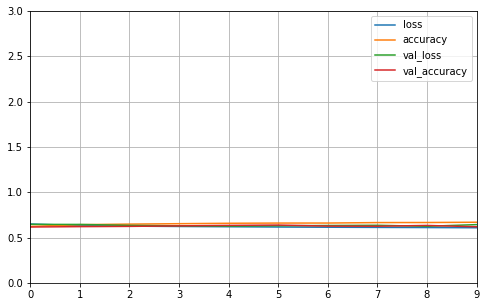

In [97]:
history = model.fit(X_transform_resamp, y_resample, validation_data = (X_test_trans, y_test), epochs = 10, batch_size = 16).history



pd.DataFrame(history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 3) # set the vertical range to [0-1]
plt.show()

(19840, 10)

1    9920
0    9920
Name: 0, dtype: int64